### Stock Market Prediction And Forecasting Using LSTM 

In [2]:
### Keras and Tensorflow >2.0

# Data collection

In [3]:
# # ### Data Collection
# import pandas_datareader as pdr
# key="f81502d210d7c635969495eeae478f0f6717a63a"

In [4]:
# df = pdr.get_data_tiingo('GOOG', api_key=key)

In [5]:
# df.to_csv('tata.csv')

## Data Pre-processing

In [6]:
import pandas as pd
import sys

In [7]:
df=pd.read_csv('tata.csv')

In [8]:
df.head(10)
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,TTM,2021-06-30 00:00:00+00:00,22.78,22.81,22.605,22.69,716443,22.78,22.81,22.605,22.69,716443,0.0,1.0
1253,TTM,2021-07-01 00:00:00+00:00,22.97,23.12,22.845,22.92,1032877,22.97,23.12,22.845,22.92,1032877,0.0,1.0
1254,TTM,2021-07-02 00:00:00+00:00,23.05,23.14,22.921,23.04,663973,23.05,23.14,22.921,23.04,663973,0.0,1.0
1255,TTM,2021-07-06 00:00:00+00:00,20.33,20.86,20.320,20.80,4327788,20.33,20.86,20.320,20.80,4327788,0.0,1.0
1256,TTM,2021-07-07 00:00:00+00:00,20.51,20.71,20.410,20.64,3866486,20.51,20.71,20.410,20.64,3866486,0.0,1.0


In [9]:
df.shape 

(1257, 14)

In [10]:
if len(df)>1257:
    N = len(df)-1257
    df=df.iloc[:-N,:]
if len(df)<1257:
    print("Your dataset has less data then minimum required")
    sys.exit()

In [11]:
df1=df.reset_index()['close']

In [12]:
df1

0       36.27
1       36.32
2       35.92
3       36.13
4       36.55
        ...  
1252    22.78
1253    22.97
1254    23.05
1255    20.33
1256    20.51
Name: close, Length: 1257, dtype: float64

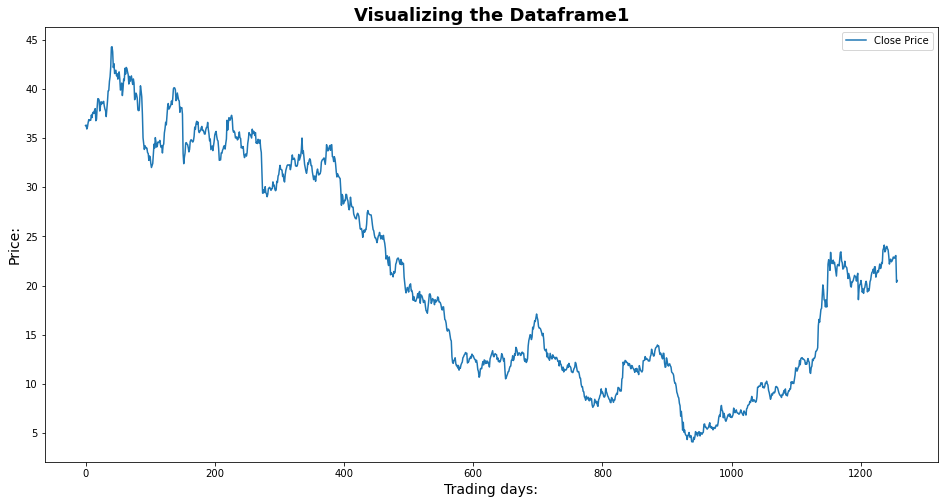

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df1,label="Close Price")
plt.title('Visualizing the Dataframe1', fontsize = 18, fontweight="bold")
plt.xlabel("Trading days:",fontsize = 14)
plt.ylabel("Price:",fontsize = 14)
plt.legend()

## Normalize the Data

In [14]:
import numpy as np

In [15]:
df1

0       36.27
1       36.32
2       35.92
3       36.13
4       36.55
        ...  
1252    22.78
1253    22.97
1254    23.05
1255    20.33
1256    20.51
Name: close, Length: 1257, dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
print(df1)

[[0.80054713]
 [0.8017906 ]
 [0.79184283]
 ...
 [0.47177319]
 [0.40412833]
 [0.40860482]]


## splitting dataset into train and test split

In [18]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(817, 440)

In [20]:
train_data

array([[0.80054713],
       [0.8017906 ],
       [0.79184283],
       [0.79706541],
       [0.80751057],
       [0.81546879],
       [0.81298185],
       [0.81422532],
       [0.81397662],
       [0.82715742],
       [0.82069137],
       [0.83188262],
       [0.83436956],
       [0.83113653],
       [0.83934345],
       [0.84332256],
       [0.81273315],
       [0.81646357],
       [0.84680428],
       [0.86844069],
       [0.86819199],
       [0.86471027],
       [0.83735389],
       [0.84804775],
       [0.86073116],
       [0.85501119],
       [0.859239  ],
       [0.85824422],
       [0.86172594],
       [0.850286  ],
       [0.84232778],
       [0.83785128],
       [0.82317831],
       [0.84183039],
       [0.86247202],
       [0.88833623],
       [0.88908232],
       [0.91245959],
       [0.92414822],
       [0.94876896],
       [0.99875653],
       [1.        ],
       [0.9868192 ],
       [0.9472768 ],
       [0.95697588],
       [0.93210644],
       [0.93956727],
       [0.940

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Create the Stacked LSTM model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [28]:
# model.summary()

In [29]:
#model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

In [30]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [31]:

from tensorflow.keras.models import load_model
model = load_model("AAPL10.h5")

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics for LSTM

In [34]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

25.63170213089383

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

13.860850765853595

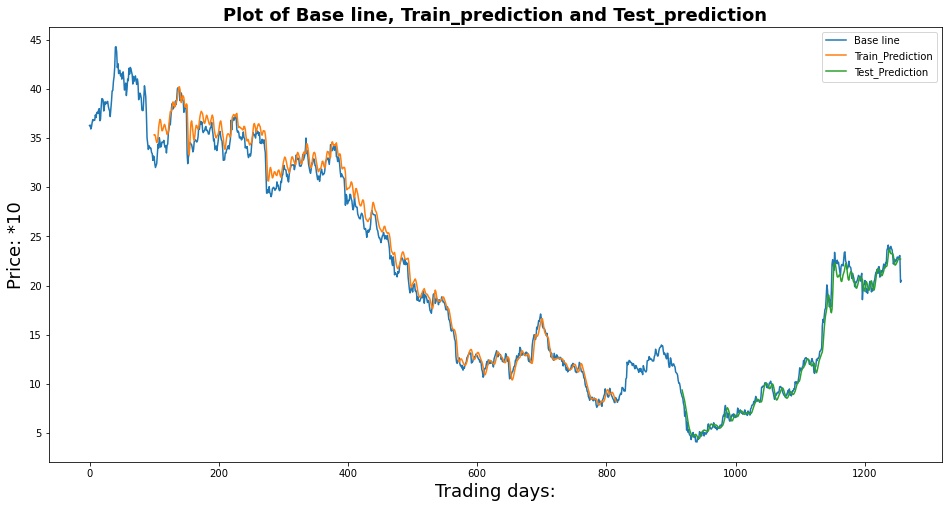

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.title('Plot of Base line, Train_prediction and Test_prediction', fontsize = 18, fontweight="bold")
plt.plot(scaler.inverse_transform(df1),label="Base line")
plt.plot(trainPredictPlot,label="Train_Prediction")
plt.plot(testPredictPlot, label= "Test_Prediction")
plt.xlabel('Trading days:',fontsize = 18)
plt.ylabel('Price: *10',fontsize = 18)
#plt.show()
plt.legend()

In [37]:
len(test_data)

440

In [38]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

## Forecasting for the future 30 days:

In [40]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.41684332]
101
1 day input [0.45088286 0.45461328 0.44242726 0.43148471 0.41979607 0.44391942
 0.44889331 0.44864462 0.44541159 0.45983586 0.47923402 0.48097488
 0.458095   0.4536185  0.43745337 0.43919423 0.44342203 0.45734892
 0.4449142  0.44292465 0.44093509 0.42899776 0.41357871 0.42626212
 0.41904999 0.41258393 0.39393186 0.3919423  0.40586919 0.4051231
 0.40885352 0.41556827 0.42153693 0.41904999 0.41681174 0.40711266
 0.41929868 0.42675951 0.36010943 0.3874658  0.39716488 0.40014922
 0.40860482 0.3964188  0.3790102  0.38671972 0.37602586 0.38846058
 0.39119622 0.40164138 0.40661527 0.39840836 0.37975628 0.3874658
 0.38249192 0.38870928 0.40562049 0.41034569 0.42203432 0.42949515
 0.43073862 0.43720468 0.42675951 0.44317334 0.44342203 0.41706043
 0.42501865 0.42825168 0.43372295 0.42999254 0.43969162 0.45013678
 0.43894554 0.4404377  0.45411589 0.45162895 0.48545138 0.49042527
 0.49813479 0.48097488 0.4844566  0.49291221 0.49490177 0.4891818
 0.48594877 0.47003233 0.45013678 0.

 0.40725261 0.41087303 0.41404364 0.41659322]
11 day output [[0.41848132]]
12 day input [0.48097488 0.458095   0.4536185  0.43745337 0.43919423 0.44342203
 0.45734892 0.4449142  0.44292465 0.44093509 0.42899776 0.41357871
 0.42626212 0.41904999 0.41258393 0.39393186 0.3919423  0.40586919
 0.4051231  0.40885352 0.41556827 0.42153693 0.41904999 0.41681174
 0.40711266 0.41929868 0.42675951 0.36010943 0.3874658  0.39716488
 0.40014922 0.40860482 0.3964188  0.3790102  0.38671972 0.37602586
 0.38846058 0.39119622 0.40164138 0.40661527 0.39840836 0.37975628
 0.3874658  0.38249192 0.38870928 0.40562049 0.41034569 0.42203432
 0.42949515 0.43073862 0.43720468 0.42675951 0.44317334 0.44342203
 0.41706043 0.42501865 0.42825168 0.43372295 0.42999254 0.43969162
 0.45013678 0.43894554 0.4404377  0.45411589 0.45162895 0.48545138
 0.49042527 0.49813479 0.48097488 0.4844566  0.49291221 0.49490177
 0.4891818  0.48594877 0.47003233 0.45013678 0.46058194 0.4625715
 0.45585675 0.45784631 0.46182542 0.468042

 0.42260665 0.42360249 0.42493078 0.42660132]
20 day output [[0.42857498]]
21 day input [0.44093509 0.42899776 0.41357871 0.42626212 0.41904999 0.41258393
 0.39393186 0.3919423  0.40586919 0.4051231  0.40885352 0.41556827
 0.42153693 0.41904999 0.41681174 0.40711266 0.41929868 0.42675951
 0.36010943 0.3874658  0.39716488 0.40014922 0.40860482 0.3964188
 0.3790102  0.38671972 0.37602586 0.38846058 0.39119622 0.40164138
 0.40661527 0.39840836 0.37975628 0.3874658  0.38249192 0.38870928
 0.40562049 0.41034569 0.42203432 0.42949515 0.43073862 0.43720468
 0.42675951 0.44317334 0.44342203 0.41706043 0.42501865 0.42825168
 0.43372295 0.42999254 0.43969162 0.45013678 0.43894554 0.4404377
 0.45411589 0.45162895 0.48545138 0.49042527 0.49813479 0.48097488
 0.4844566  0.49291221 0.49490177 0.4891818  0.48594877 0.47003233
 0.45013678 0.46058194 0.4625715  0.45585675 0.45784631 0.46182542
 0.46804278 0.46630191 0.46505844 0.46978364 0.47177319 0.40412833
 0.40860482 0.41684332 0.40246966 0.3967425

 0.43964127 0.4413929  0.4428342  0.44394928]
29 day output [[0.44474542]]
[[0.41684332489967346], [0.402469664812088], [0.396742582321167], [0.39573726058006287], [0.3971741795539856], [0.39996251463890076], [0.4034821391105652], [0.40725260972976685], [0.41087302565574646], [0.4140436351299286], [0.4165932238101959], [0.41848132014274597], [0.4197816550731659], [0.4206489622592926], [0.4212802052497864], [0.421874463558197], [0.4226066470146179], [0.42360249161720276], [0.42493078112602234], [0.4266013205051422], [0.42857497930526733], [0.4307711124420166], [0.43308553099632263], [0.4354054927825928], [0.43762239813804626], [0.4396412670612335], [0.4413928985595703], [0.44283419847488403], [0.44394928216934204], [0.44474542140960693]]


In [41]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [42]:
import matplotlib.pyplot as plt

In [43]:
len(df1)

1257

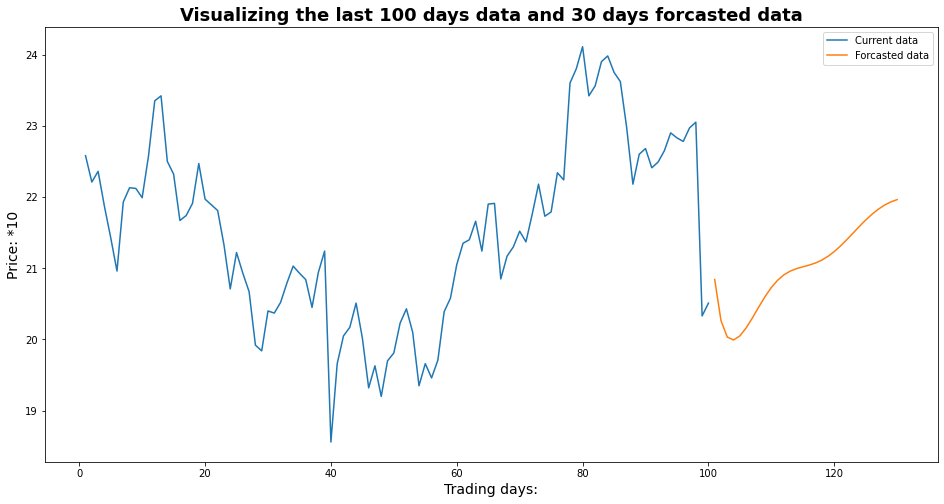

In [44]:
plt.figure(figsize=(16,8))
plt.title("Visualizing the last 100 days data and 30 days forcasted data", fontsize = 18, fontweight='bold')
plt.plot(day_new,scaler.inverse_transform(df1[1157:]),label="Current data")
plt.plot(day_pred,scaler.inverse_transform(lst_output),label="Forcasted data")
plt.xlabel("Trading days:", fontsize=14)
plt.ylabel("Price: *10", fontsize = 14)
plt.legend()

Text(0, 0.5, 'Price: *10')

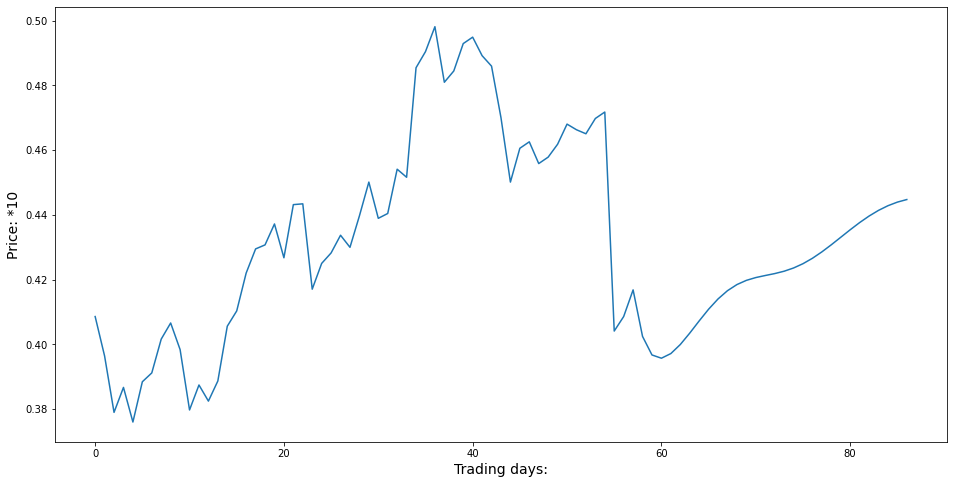

In [45]:
plt.figure(figsize=(16,8))
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])
plt.xlabel("Trading days:", fontsize=14)
plt.ylabel("Price: *10", fontsize = 14)

In [46]:
df3=scaler.inverse_transform(df3).tolist()

Text(0, 0.5, 'Price: *10')

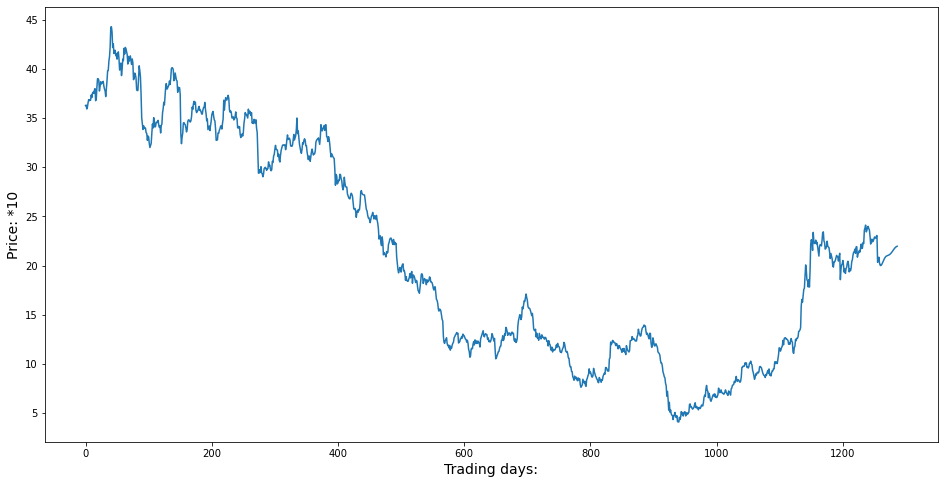

In [47]:
plt.figure(figsize=(16,8))
plt.plot(df3)
plt.xlabel("Trading days:", fontsize=14)
plt.ylabel("Price: *10", fontsize = 14)